In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [34]:
! pip install dataprep


  Obtaining dependency information for dataprep from https://files.pythonhosted.org/packages/c1/f6/a436212906c86453470027c181656021a03a39df8eb33afae2485e662588/dataprep-0.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for bokeh<3,>=2 from https://files.pythonhosted.org/packages/15/06/706a9c43436cd0c3e2f4b94e93ae837e74965e59565c596b727974a74169/bokeh-2.4.3-py3-none-any.whl.metadata
  Obtaining dependency information for dask[array,dataframe,delayed]<3.0,>=2.25 from https://files.pythonhosted.org/packages/04/94/b4012c61c09300f4413c58a522a6cc1a212dc4a7f6fe1ba98d67429c089d/dask-2.30.0-py3-none-any.whl.metadata
  Obtaining dependency information for flask<2.0.0,>=1.1.4 from https://files.pythonhosted.org/packages/e8/6d/994208daa354f68fd89a34a8bafbeaab26fda84e7af1e35bdaed02b667e6/Flask-1.1.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flask_cors<4.0.0,>=3.0.10 from https://files.pythonhosted.org/packages/db/84/901e700de86604b1c4ef4b57110d4e947c218b9

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [28 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\Levenshtein
      copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-311\Levenshtein
      copying Levenshtein\__init__.py -> build\lib.win-amd64-cpython-311\Levenshtein
      running egg_info
      writing levenshtein.egg-info\PKG-INFO
      writing dependency_links to levenshtein.egg-info\dependency_links.txt
      deleting levenshtein.egg-info\entry_points.txt
      writing namespace_packages to levenshtein.egg-info\namespace_packages.txt
      writing requirements to levenshtein.egg-info\requires.txt
      writing top-level names to levenshtein.egg-info\top_level.txt
      reading manifest file 'levenshtein.egg-info\SOURCES.txt'
      reading m

In [2]:
data = pd.read_csv("glass.csv")

In [3]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
data.shape

(214, 10)

In [5]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [14]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [12]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [17]:
data[data.duplicated()].shape

(1, 10)

In [18]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [21]:
data['Type'].value_counts().sort_index(ascending=True)

1    69
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

C:\Users\AKSHAY\AppData\Local\Temp\ipykernel_7812\3066154151.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)


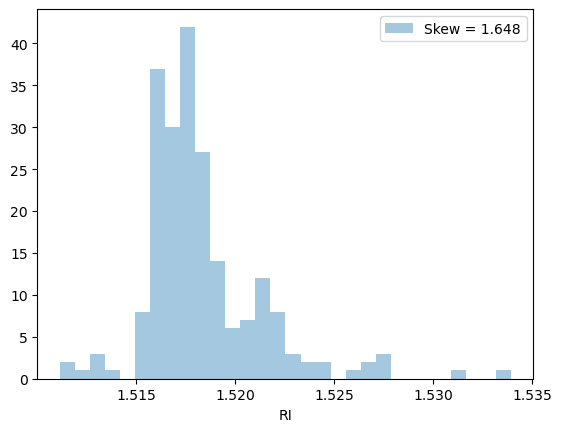

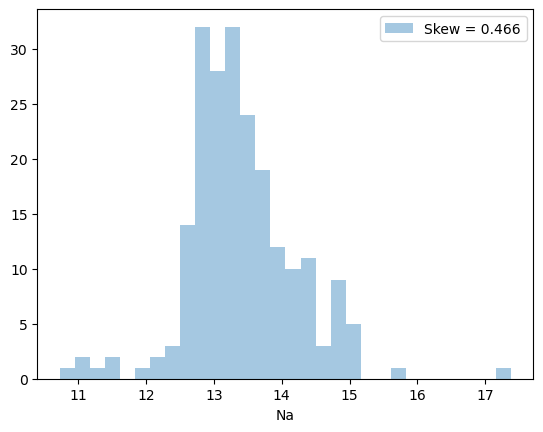

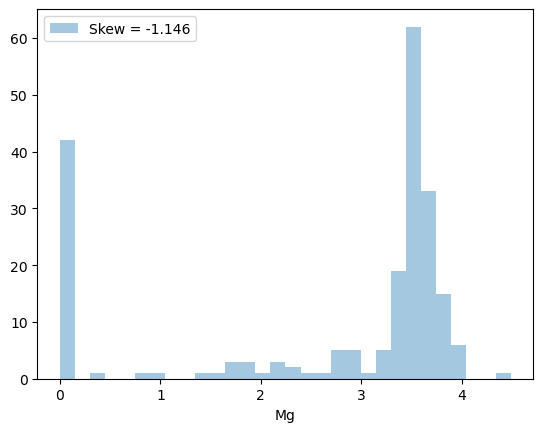

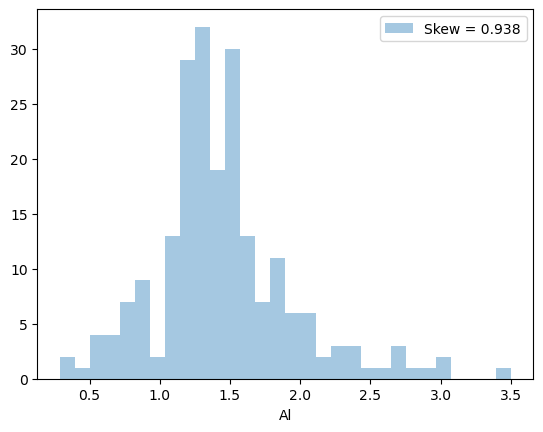

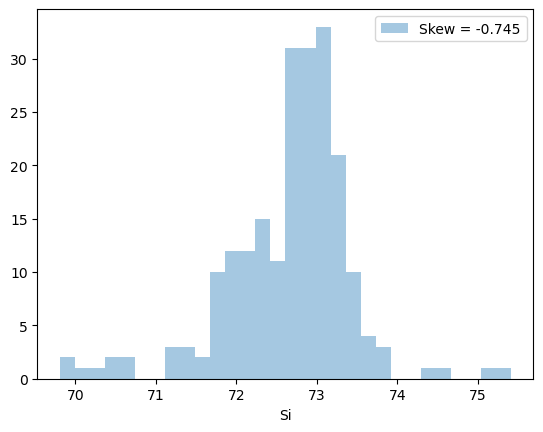

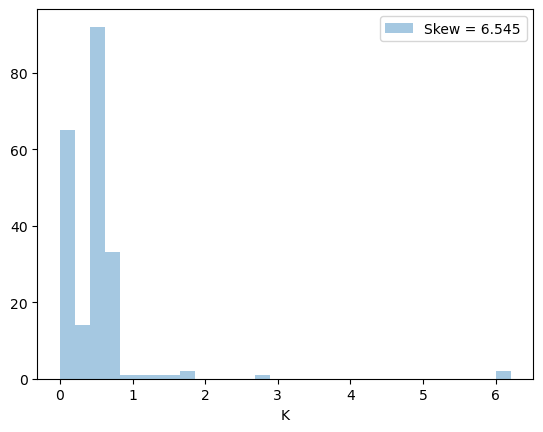

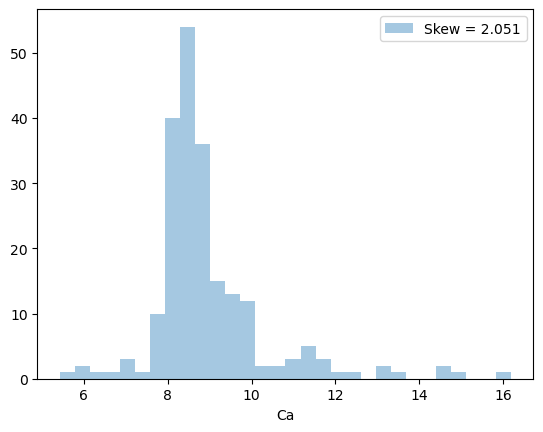

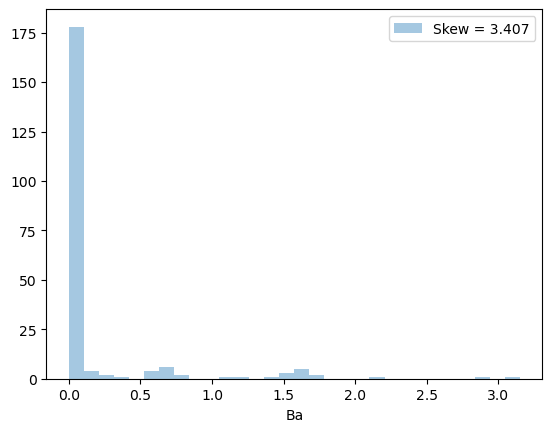

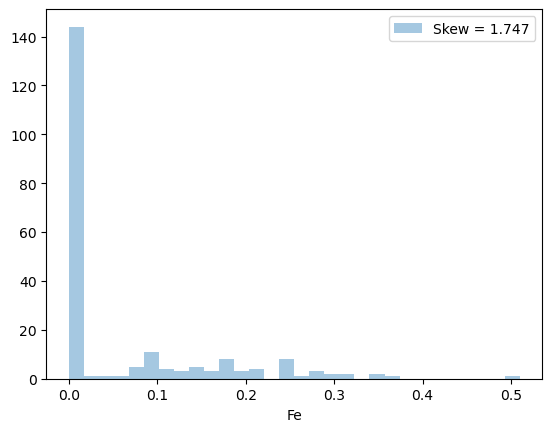

In [23]:
features = data.columns[:-1].tolist()
for feat in features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [26]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    outlier_indices = []
    
    # iterate over features
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        
        #IQR
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data[features])))) 

The dataset contains 14 observations with more than 2 outliers


In [27]:
list(data)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

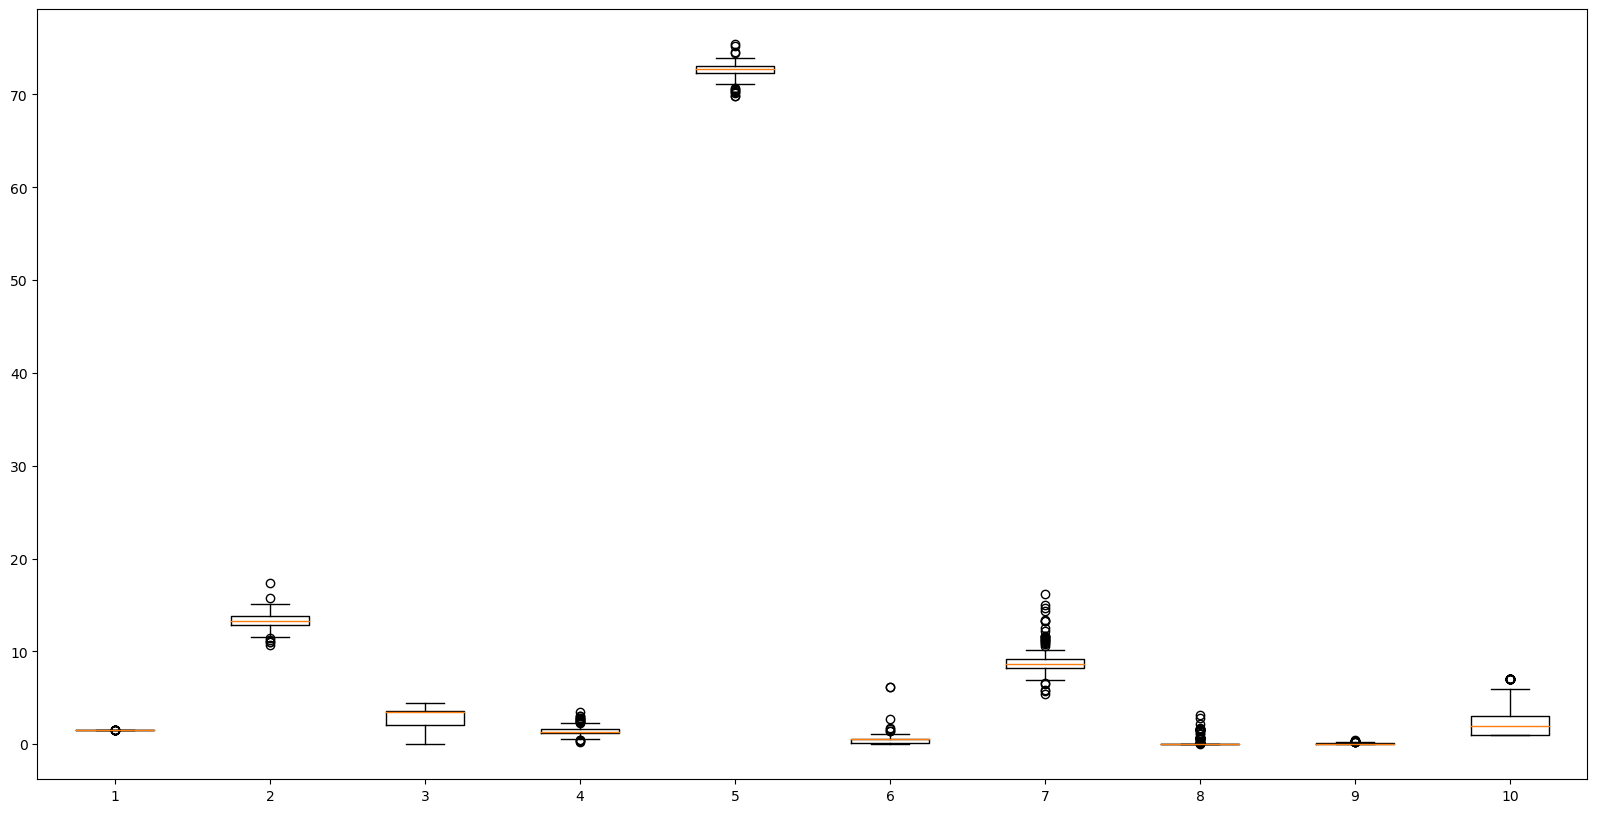

In [31]:
plt.subplots(figsize=(20,10))
plt.subplot()
plt.boxplot(data)
plt.show()

In [32]:
outlier_indices = outlier_hunt(data[features])
df = data.drop(outlier_indices).reset_index(drop=True)
print(df.shape)
df.head()

(199, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [15]:
colname=[]
for x in data.columns:
    if data[x].dtypes=='int':
        colname.append(x)
colname

[]

In [16]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    data[x]=le.fit_transform(data[x])
    
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature',x)
    print('mapping',le_name_mapping)